In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# data Combined into a single dataset
merged_mice_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Displayed table for preview
merged_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Total number of mice.
unique_mice = merged_mice_data['Mouse ID'].unique()
mice_count = len(unique_mice)
rows_merged_data = len(merged_mice_data)

print(f'Unique mouse count in merged data: {mice_count}')


Unique mouse count in merged data: 249


In [3]:
# Duplicated mice record by ID number that shows up for Mouse ID and Timepoint with the corresponding data. 
duplicate = merged_mice_data[merged_mice_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Getting Clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice_data = merged_mice_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
cleaned_mice_rows=(len(cleaned_mice_data))
cleaned_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = cleaned_mice_data['Mouse ID'].unique()
cleaned_mice_count = len(cleaned_mice_count)
rows_of_duplicates = len(duplicate)
difference_of_merged_and_cleaned = rows_merged_data - cleaned_mice_rows 
print(f'total unique mice in cleaned data: {cleaned_mice_count}')
print(f'--------------------------------------')
print(f'Total number of rows in merged mouse data: {rows_merged_data}')
print(f'Total number rows of cleaned mouse data: {cleaned_mice_rows}')
print(f'Number of rows in duplicate mouse data: {rows_of_duplicates}')
print(f'Difference of merged rows and cleaned rows: {difference_of_merged_and_cleaned}')



total unique mice in cleaned data: 249
--------------------------------------
Total number of rows in merged mouse data: 1893
Total number rows of cleaned mouse data: 1883
Number of rows in duplicate mouse data: 10
Difference of merged rows and cleaned rows: 10


## Summary Statistics

In [6]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_group = cleaned_mice_data.groupby(['Drug Regimen'])

tumor_volume_mean = drug_regimen_group.mean()
mean = tumor_volume_mean['Tumor Volume (mm3)']

tumor_volume_med = drug_regimen_group.median()
median = tumor_volume_med['Tumor Volume (mm3)']

tumor_volume_var = drug_regimen_group.var()
variance = tumor_volume_var['Tumor Volume (mm3)']

tumor_volume_std = drug_regimen_group.std()
std = tumor_volume_std['Tumor Volume (mm3)']

tumor_volume_sem = drug_regimen_group.sem()
sem = tumor_volume_sem['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.

summary_statistics = pd.DataFrame({"Mean": mean,
                                   "Median": median,
                                   "Variance": variance,
                                   "Standard Deviation": std,
                                   "SEM": sem
                                   })

summary_statistics = summary_statistics.round(2)

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method

summary_statistics_agg = cleaned_mice_data.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_statistics_agg = summary_statistics_agg.rename(columns={'mean': 'Mean', 'median': 'Median', 'var':'Variance', 'std': 'Standard Deviation', 'sem':'SEM'})
summary_statistics_agg.round(2)

Tumor Volume (mm3)                                         
                           Mean Median Variance Standard Deviation   SEM
Drug Regimen                                                            
Capomulin                 40.68  41.56    24.95               4.99  0.33
Ceftamin                  52.59  51.78    39.29               6.27  0.47
Infubinol                 52.88  51.82    43.13               6.57  0.49
Ketapril                  55.24  53.70    68.55               8.28  0.60
Naftisol                  54.33  52.51    66.17               8.13  0.60
Placebo                   54.03  52.29    61.17               7.82  0.58
Propriva                  52.46  50.85    44.05               6.64  0.54
Ramicane                  40.22  40.67    23.49               4.85  0.32
Stelasyn                  54.23  52.43    59.45               7.71  0.57
Zoniferol                 53.24  51.82    48.53               6.97  0.52

## Number of Mice Used Per Drug

In [8]:
# Mouse per Regimen
drug_regimen_count = drug_regimen_group.count()
drug_regimen_list = cleaned_mice_data["Drug Regimen"].unique()
num_unique_mice = drug_regimen_count["Mouse ID"]
num_unique_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<AxesSubplot:title={'center':'Number of Unique Mice Per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Unique Mice'>

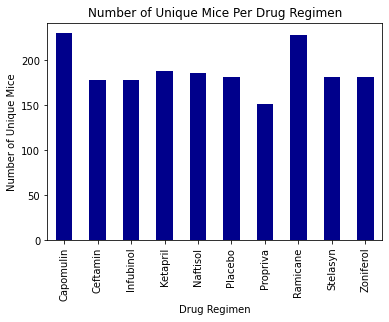

In [9]:
# Bar plot showing the total number of unique mice tested on each drug regimen using pandas.
num_unique_mice.plot(kind="bar",title="Number of Unique Mice Per Drug Regimen", ylabel="Number of Unique Mice", color="darkblue", width=0.5)


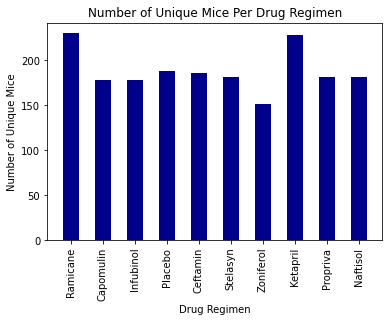

In [10]:
# Bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(drug_regimen_list, num_unique_mice, color="darkblue", alpha=1, align="center", width=0.5)
plt.xticks(rotation="vertical")

plt.title('Number of Unique Mice Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mice')
plt.show()

## Distribution of Male and Female Mice

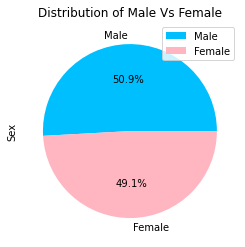

In [11]:
# Pie plot showing the distribution of female versus male mice using pandas
gender_count = cleaned_mice_data["Sex"].value_counts()

colors = ["deepskyblue", "lightpink"]

gender_count.plot(kind="pie", title="Distribution of Male Vs Female", legend=True, autopct='%1.1f%%', colors=colors)
plt.show()


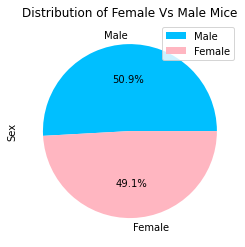

In [12]:
# Pie plot showing the distribution of female versus male mice using pyplot
labels=["Male", "Female"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Distribution of Female Vs Male Mice")
plt.ylabel("Sex")
plt.legend(labels)
plt.show()

## Final Tumor Volumes per Drug Regimen

In [15]:
# The final tumor volume of each mouse was calculated across all the treatment regimens:  

# Calculation for the last (greatest) timepoint for each mouse
mice_group = cleaned_mice_data.groupby(['Mouse ID'])["Timepoint"]
greatest_time = mice_group.max()
greatest_time = greatest_time.reset_index()

# The original dataframe Merged with the greatest time to get the tumor volume at the last timepoint
fin_tum_vol = pd.merge(greatest_time, cleaned_mice_data, on=["Mouse ID","Timepoint"])
# Unnecessary columns dropped.
finaltumorvolume_df = fin_tum_vol.drop(columns=['Mouse ID', 'Timepoint', 'Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
# Tumor Volume Sorted to Find most promising regimens
finaltumorvolume_df_sorted = finaltumorvolume_df.sort_values(by='Tumor Volume (mm3)', ascending=True)

In [18]:
# Tumor Volumes Sorted
finaltumorvolume_df_sorted.head(50)

,Drug Regimen,Tumor Volume (mm3)
97,Ramicane,22.050126
175,Capomulin,23.343598
122,Capomulin,28.430964
227,Capomulin,28.484033
70,Ramicane,29.128472
178,Ramicane,30.276232
61,Capomulin,30.485985
120,Ramicane,30.564625
245,Ramicane,30.638696
193,Capomulin,31.023923


## Quartiles, IQR and Potential Outliers

In [16]:
# Most promising treatments put into a list for forloop and plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

print(f"     Potential Outlier for Each Drug Regimen")

# The IQR and any potential outliers determination 
for treatment in treatments:
    
    # Rows which contain mice on each drug and the tumor volumes
    drug_regimen = finaltumorvolume_df.loc[finaltumorvolume_df["Drug Regimen"] == treatment, :]


    # add subset 
    tumor_vol_data.append(drug_regimen["Tumor Volume (mm3)"])
    
    # Outliers using upper and lower bounds
    tumor = drug_regimen["Tumor Volume (mm3)"]
    quartiles = tumor.quantile([0.25, 0.5, 0.75]).round(2)
   
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = upperq-lowerq
    iqr_r = iqr.round(2)
    print(f"-----------------------------------------------------")
    print(f"                   {treatment}")
    print(f"-----------------------------------------------------")
    print(f"Q1: {lowerq}")
    print(f"Q2: {quartiles[0.5]} ")
    print(f"Q3: {upperq}")
    print(f"Interquartile Range: {iqr_r}")
    lower_bound = lowerq - (1.5*iqr_r)
    upper_bound = upperq + (1.5*iqr_r)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

     Potential Outlier for Each Drug Regimen
-----------------------------------------------------
                   Capomulin
-----------------------------------------------------
Q1: 32.38
Q2: 38.13 
Q3: 40.16
Interquartile Range: 7.78
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.
-----------------------------------------------------
                   Ramicane
-----------------------------------------------------
Q1: 31.56
Q2: 36.56 
Q3: 40.66
Interquartile Range: 9.1
Values below 17.91 could be outliers.
Values above 54.309999999999995 could be outliers.
-----------------------------------------------------
                   Infubinol
-----------------------------------------------------
Q1: 54.05
Q2: 60.17 
Q3: 65.53
Interquartile Range: 11.48
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.
-----------------------------------------------------
                   Ceftamin
---------------------------------------------------

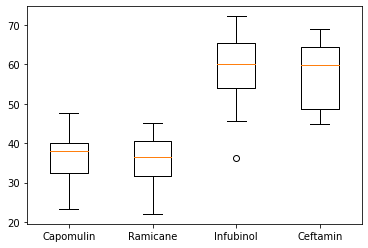

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(tumor_vol_data,  labels=treatments)


plt.show()

## Line and Scatter Plots

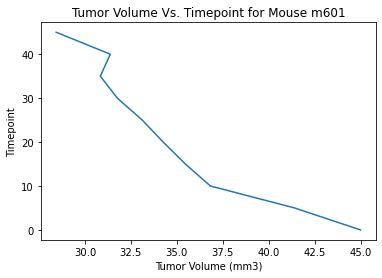

In [18]:
# Line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_mouse = cleaned_mice_data.loc[cleaned_mice_data["Mouse ID"] == "m601", :]
plt.plot(line_mouse["Tumor Volume (mm3)"],line_mouse["Timepoint"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title(f'Tumor Volume Vs. Timepoint for Mouse m601')
plt.show()

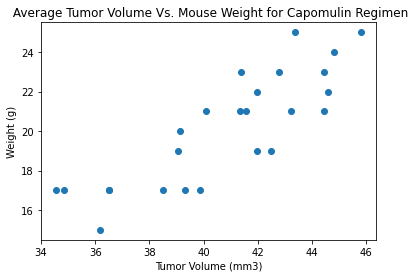

In [19]:
# A scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_loc = cleaned_mice_data.loc[cleaned_mice_data["Drug Regimen"] == "Capomulin", :]
capomulin_scatter = capomulin_loc.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_scatter["Tumor Volume (mm3)"],capomulin_scatter["Weight (g)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title(f' Average Tumor Volume Vs. Mouse Weight for Capomulin Regimen')
plt.show()



## Correlation and Regression

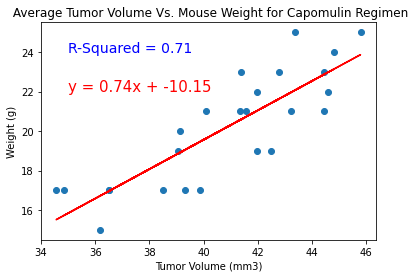

In [20]:
# The correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_scatter["Tumor Volume (mm3)"]
y_values = capomulin_scatter["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rvalue = rvalue**2
rvaluer = rvalue.round(2)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(35,22),fontsize=15,color="red")
plt.annotate((f'R-Squared = {rvaluer}'),(35,24),fontsize=14,color="blue")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title(f' Average Tumor Volume Vs. Mouse Weight for Capomulin Regimen')
plt.show()

# Observations and Insights

1.In the Capomulin line graph you can clearer see a decrease in the tumor volume over time, it would be interesting to do a scatter plot of tumor volumes for each unique mouse vs time point and test the r-squared.

2.The scatter plot "tumor volume vs weight" clearly shows a correlation (albeit not perfect), this could lead to further analysis: You could divide each mouse according to various weight classes and see how the drug regimen affected each weigh class. Was each mouse given the same dose regardless of weight? Did weight affect the change in tumor volume? etc.

3.It would be interesting to pull out the potential outlier and see how this affects the trends/correlation.